# Decision Tree Classification

# 1. What is a Decision Tree?

It is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Before learning more about decision trees let’s get familiar with some of the terminologies.

Root Nodes – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

Decision Nodes – the nodes we get after splitting the root nodes are called Decision Node

Leaf Nodes – the nodes where further splitting is not possible are called leaf nodes or terminal nodes

Sub-tree – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

Pruning – is nothing but cutting down some nodes to stop overfitting

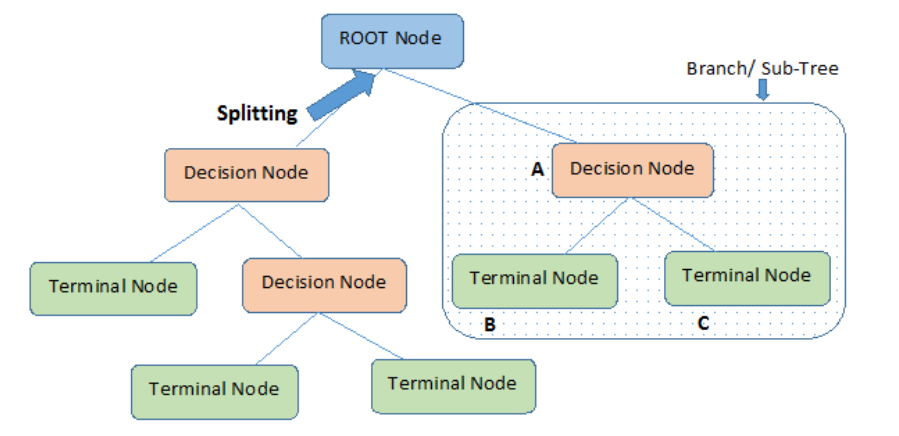

# Example of a decision tree

Let’s understand decision trees with the help of an example.

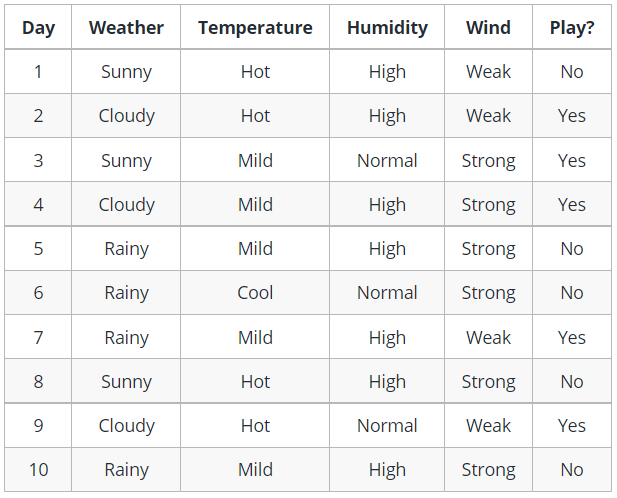

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In the below diagram the tree will first ask what is the weather? Is it sunny, cloudy, or rainy? If yes then it will go to the next feature which is humidity and wind. It will again check if there is a strong wind or weak, if it’s a weak wind and it’s rainy then the person may go and play.

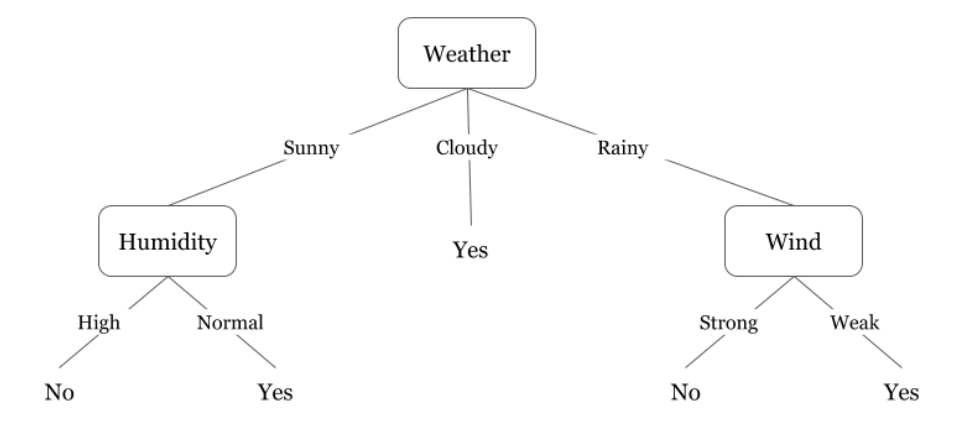

Did you notice anything in the above flowchart? We see that if the weather is cloudy then we must go to play. Why didn’t it split more? Why did it stop there?

To answer this question, we need to know about few more concepts like entropy, information gain, and Gini index. But in simple terms, I can say here that the output for the training dataset is always yes for cloudy weather, since there is no disorderliness here we don’t need to split the node further.

The goal of machine learning is to decrease uncertainty or disorders from the dataset and for this, we use decision trees.

Now you must be thinking how do I know what should be the root node? what should be the decision node? when should I stop splitting? To decide this, there is a metric called “Entropy” which is the amount of uncertainty in the dataset.

# Entropy

Entropy is nothing but the uncertainty in our dataset or measure of disorder. Let me try to explain this with the help of an example

Suppose you have a group of friends who decides which movie they can watch together on Sunday. There are 2 choices for movies, one is “Lucy” and the second is “Titanic” and now everyone has to tell their choice. After everyone gives their answer we see that “Lucy” gets 4 votes and “Titanic” gets 5 votes. Which movie do we watch now? Isn’t it hard to choose 1 movie now because the votes for both the movies are somewhat equal.

This is exactly what we call disorderness, there is an equal number of votes for both the movies, and we can’t really decide which movie we should watch. It would have been much easier if the votes for “Lucy” were 8 and for “Titanic” it was 2. Here we could easily say that the majority of votes are for “Lucy” hence everyone will be watching this movie.

In a decision tree, the output is mostly “yes” or “no”

The formula for Entropy is shown below:



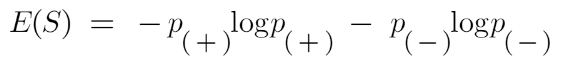

Here p+ is the probability of positive class

p– is the probability of negative class

S is the subset of the training example

# How do Decision Trees use Entropy?

Now we know what entropy is and what is its formula, Next, we need to know that how exactly does it work in this algorithm.

Entropy basically measures the impurity of a node. Impurity is the degree of randomness; it tells how random our data is. A pure sub-split means that either you should be getting “yes”, or you should be getting “no”.

Suppose a feature has 8 “yes” and 4 “no” initially, after the first split the left node gets 5 ‘yes’ and 2 ‘no’ whereas right node gets 3 ‘yes’ and 2 ‘no’.

We see here the split is not pure, why? Because we can still see some negative classes in both the nodes. In order to make a decision tree, we need to calculate the impurity of each split, and when the purity is 100%, we make it as a leaf node.

To check the impurity of feature 2 and feature 3 we will take the help for Entropy formula.

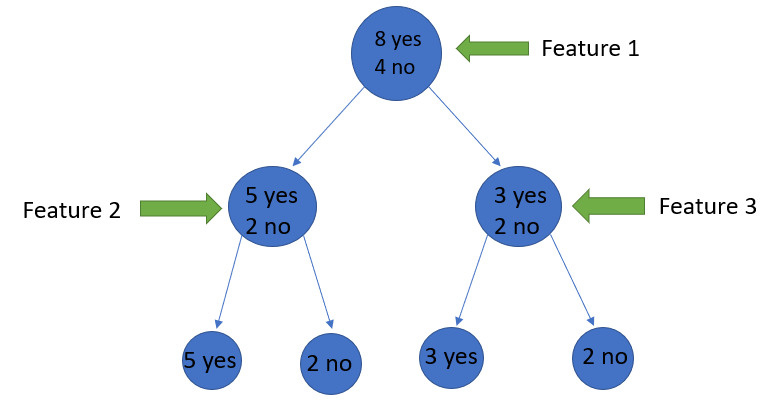

# 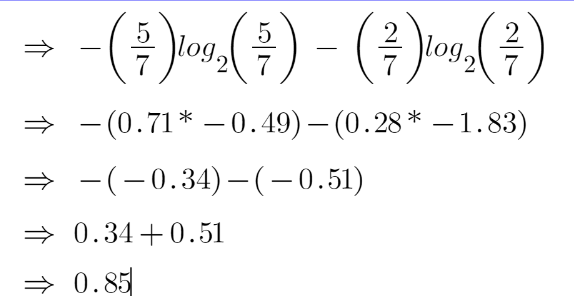

For feature 3,

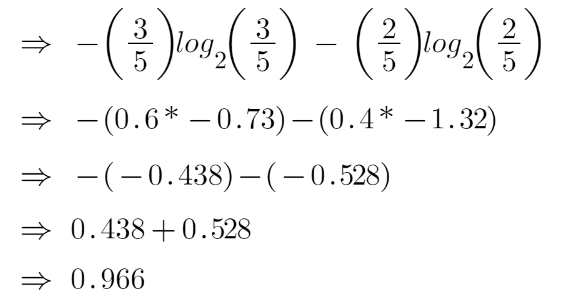

We can clearly see from the tree itself that left node has low entropy or more purity than right node since left node has a greater number of “yes” and it is easy to decide here.

Always remember that the higher the Entropy, the lower will be the purity and the higher will be the impurity.

As mentioned earlier the goal of machine learning is to decrease the uncertainty or impurity in the dataset, here by using the entropy we are getting the impurity of a particular node, we don’t know if the parent entropy or the entropy of a particular node has decreased or not.

For this, we bring a new metric called “Information gain” which tells us how much the parent entropy has decreased after splitting it with some feature.

# Information Gain


Information gain measures the reduction of uncertainty given some feature and it is also a deciding factor for which attribute should be selected as a decision node or root node.

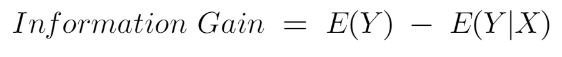

Information Gain = It is just entropy of the full dataset – entropy of the dataset given some feature.

To understand this better let’s consider an example:
Suppose our entire population has a total of 30 instances. The dataset is to predict whether the person will go to the gym or not. Let’s say 16 people go to the gym and 14 people don’t

Now we have two features to predict whether he/she will go to the gym or not.

Feature 1 is “Energy” which takes two values “high” and “low”

Feature 2 is “Motivation” which takes 3 values “No motivation”, “Neutral” and “Highly motivated”.

Let’s see how our decision tree will be made using these 2 features. We’ll use information gain to decide which feature should be the root node and which feature should be placed after the split.

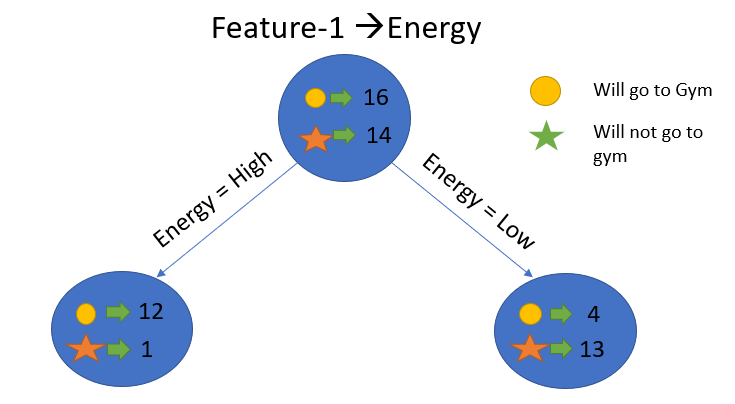

Let’s calculate the entropy:

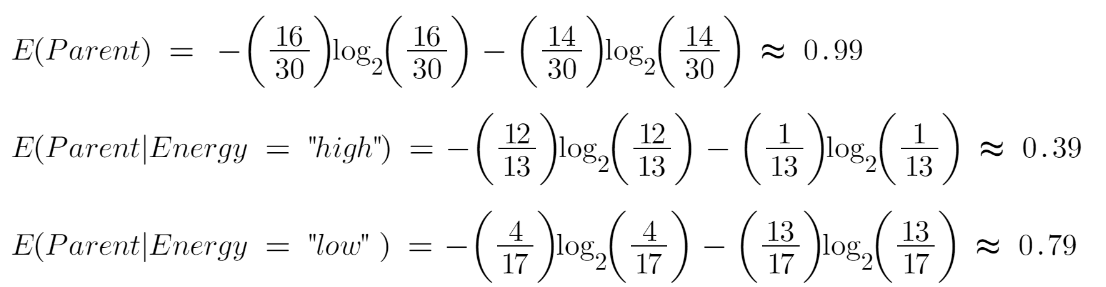

To see the weighted average of entropy of each node we will do as follows:

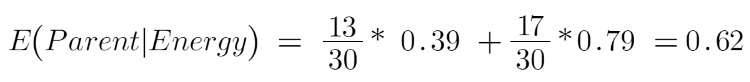

Now we have the value of E(Parent) and E(Parent|Energy), information gain will be:

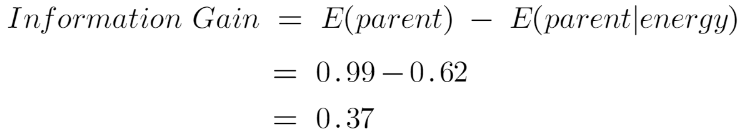

Our parent entropy was near 0.99 and after looking at this value of information gain, we can say that the entropy of the dataset will decrease by 0.37 if we make “Energy” as our root node.

Similarly, we will do this with the other feature “Motivation” and calculate its information gain.

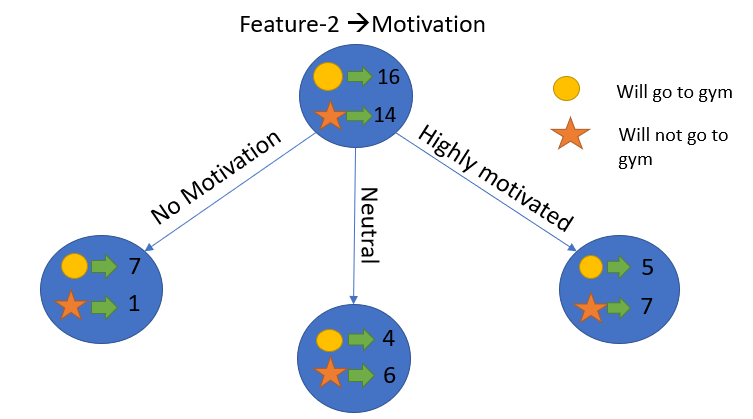

Let’s calculate the entropy:

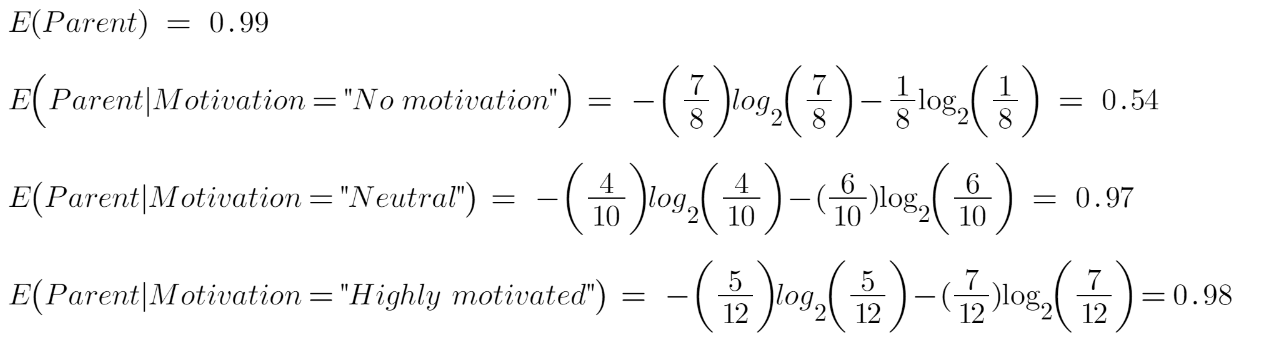

To see the weighted average of entropy of each node we will do as follows:

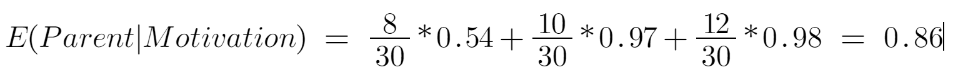

Now we have the value of E(Parent) and E(Parent|Motivation), information gain will be:

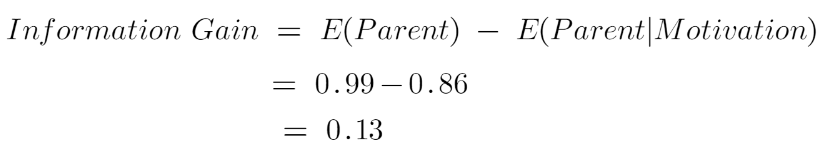

We now see that the “Energy” feature gives more reduction which is 0.37 than the “Motivation” feature. Hence we will select the feature which has the highest information gain and then split the node based on that feature.

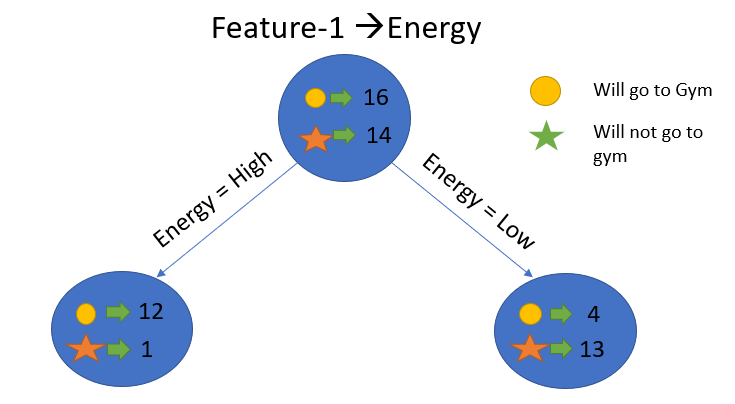

In this example “Energy” will be our root node and we’ll do the same for sub-nodes. Here we can see that when the energy is “high” the entropy is low and hence we can say a person will definitely go to the gym if he has high energy, but what if the energy is low? We will again split the node based on the new feature which is “Motivation”.

# When to stop splitting?

You must be asking this question to yourself that when do we stop growing our tree? Usually, real-world datasets have a large number of features, which will result in a large number of splits, which in turn gives a huge tree. Such trees take time to build and can lead to overfitting. That means the tree will give very good accuracy on the training dataset but will give bad accuracy in test data.

There are many ways to tackle this problem through hyperparameter tuning. We can set the maximum depth of our decision tree using the max_depth parameter. The more the value of max_depth, the more complex your tree will be. The training error will off-course decrease if we increase the max_depth value but when our test data comes into the picture, we will get a very bad accuracy. Hence you need a value that will not overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by min_samples_split. Here we specify the minimum number of samples required to do a spilt. For example, we can use a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then using this parameter, we can stop the further splitting of this node and make it a leaf node.

There are more hyperparameters such as :

min_samples_leaf – represents the minimum number of samples required to be in the leaf node. The more you increase the number, the more is the possibility of overfitting.

max_features – it helps us decide what number of features to consider when looking for the best split.

# Pruning

It is another method that can help us avoid overfitting. It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. It removes the branches which have very low importance.

There are mainly 2 ways for pruning:

(i) Pre-pruning – we can stop growing the tree earlier, which means we can prune/remove/cut a node if it has low importance while growing the tree.

(ii) Post-pruning – once our tree is built to its depth, we can start pruning the nodes based on their significance.

# Decision Tree Classification

Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

Load Dataset

In [4]:
# load Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [5]:
data.data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

Create Dataframe

In [9]:
# create dataframe
df = pd.DataFrame(np.c_[data.data,data.target],columns = [list(data.feature_names)+['target']])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [11]:
df.shape

(569, 31)

# Split Data

In [12]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2020)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of y_train =', y_train.shape)
print('Shape of y_test =', y_test.shape)

Shape of X_train =  (455, 30)
Shape of X_test = (114, 30)
Shape of y_train = (455,)
Shape of y_test = (114,)


# Train Decision Tree Classification Model 

In [15]:
from sklearn.tree import DecisionTreeClassifier

# criterion='gini'

In [16]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

In [17]:
classifier.score(X_test,y_test)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9473684210526315

# criterion='entropy'

In [20]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train,y_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy')

In [21]:
classifier_entropy.score(X_test,y_test)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9385964912280702

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [23]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
classifier_sc = DecisionTreeClassifier(criterion='gini')
classifier_sc.fit(X_train_sc,y_train)

classifier_sc.score(X_test_sc,y_test)

0.956140350877193

In [25]:
# Predict Cancer

patient1 = [17.99,
 10.38,
 122.8,
 1001.0,
 0.1184,
 0.2776,
 0.3001,
 0.1471,
 0.2419,
 0.07871,
 1.095,
 0.9053,
 8.589,
 153.4,
 0.006399,
 0.04904,
 0.05373,
 0.01587,
 0.03003,
 0.006193,
 25.38,
 17.33,
 184.6,
 2019.0,
 0.1622,
 0.6656,
 0.7119,
 0.2654,
 0.4601,
 0.1189]
 

In [30]:
patient1 = sc.transform(np.array([patient1]))
patient1

array([[ 1.14157516, -2.04268291,  1.31822055,  1.02590938,  1.62044096,
         3.42348005,  2.74540674,  2.64970572,  2.34762157,  2.34157979,
         2.47642647, -0.56729422,  2.77495792,  2.4478528 , -0.23516697,
         1.35781809,  0.68489284,  0.64085494,  1.1927004 ,  0.93126314,
         1.94777877, -1.35487239,  2.37210178,  2.06352534,  1.31020065,
         2.82342306,  2.23450433,  2.38372721,  2.86683913,  2.10454451]])

In [33]:
pred = classifier_sc.predict(patient1)
pred

array([0.])

In [34]:
if pred[0] == 0:
    print("Patient has Cancer(maligant tumor)")
else:
    print('Patient has no cancer(maligant benign)')

Patient has Cancer(maligant tumor)
